# COE 292 - Term 231
## Programming Assignmnet 2
____________

### READ THESE INSTRUCTIONS CAREFULLY
- Your submission is **auto-graded** and checked for **similarity**.
- Detected similarity and/or failuare to follow these instructions automatically results in a **ZERO** score.
- The assignmnet is to be completed indvidually or in a group of 2.
- Use tensorflow version >= 2.3.0
- Complete the areas marked below by <span>*# YOUR CODE HERE*</span>. Do not chage anything else, as this may break the entire code and result in getting a **ZERO** score.
- Uncomment and utilize all commented code.
- You may add additional code blocks that you think necessary.
- <span style="color:red">**RENAME THIS FILE TO YOUR STUDENT ID without any letters**</span>. Example **"201777777.ipynb"** for individual submission and **"201777777-201788888.ipynb"** for group of 2 submission.
- <span style="color:red">**DO NOT DELETE THE "raise NotImplementedError()" LINE**</span>.
- <span style="color:red">**All codes and return statements must come before the "raise NotImplementedError()" line.**</span>
- Do not delete or modify the empty cells that say **"DO NOT TAMPER WITH THIS CELL"**
---

### RUN THE CELL BELOW TO IMPORT NECESSARY LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

### RUN THE CELL BELOW TO PLOT THE REFERENCE GRAPH

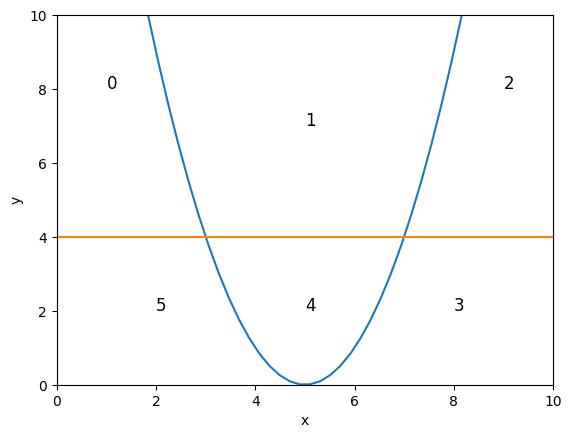

In [ ]:
plt.annotate('0', xy=(1, 8), fontsize=12)
plt.annotate('1', xy=(5, 7), fontsize=12)
plt.annotate('2', xy=(9, 8), fontsize=12)
plt.annotate('3', xy=(8, 2), fontsize=12)
plt.annotate('4', xy=(5, 2), fontsize=12)
plt.annotate('5', xy=(2, 2), fontsize=12)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')

x_range = np.linspace(0, 10, 50)
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x_range, [np.square(x-5) for x in x_range])
plt.plot(x_range, [4 for x in x_range])
plt.show()
plt.close()


<font size=3>We would like to design an MLP neural network to classify points based on the region they belong to in the above graph.</font>

<u><b>Graph Description</b></u>
1. The blue curve is a parabola with repeated roots at x = 5
2. The orange line is y = 4

## <center><b>Questions</b></center>

In [ ]:
def sample_points(n):
    '''
    arguments:
        n: number of samples

    return:
        samples: A numpy matrix of dimension nx3, where the first column represents x coordinates, the second column represents y coordinates, and the third column denotes the region label of each point
    '''

    # Use the code below as a hint. Do not tamper with it
    np.random.seed(42)
    x1 = np.random.uniform(low=0,high=10,size=n).reshape(-1,1)
    x2 = np.random.uniform(low=0,high=10,size=n).reshape(-1,1)
    x = np.concatenate([x1,x2],axis=1)

    samples = []

    for x in x:
        if x[0] <= 5:
            if x[1] >= 4:
                if np.square(x[0]-5) >= x[1]:
                    y = 0
                    # print('0', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 1
                    # print('1', x)
                    samples.append(np.hstack((x, [y])))
            else:
                if np.square(x[0]-5) >= x[1]:
                    y = 5
                    # print('5', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 4
                    # print('4', x)
                    samples.append(np.hstack((x, [y])))
        else:
            if x[1] >= 4:
                if np.square(x[0]-5) >= x[1]:
                    y = 2
                    # print('2', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 1
                    # print('1', x)
                    samples.append(np.hstack((x, [y])))
            else:
                if np.square(x[0]-5) >= x[1]:
                    y = 3
                    # print('3', x)
                    samples.append(np.hstack((x, [y])))
                else:
                    y = 4
                    # print('4', x)
                    samples.append(np.hstack((x, [y])))

    return np.array(samples)

<font size=3><b>Problem 1:</b> Generate a training set of 20,000 samples and a testing set of 1000 samples. All the points along the parabola belong to A or F or D or C. All the points along the line belong to A or B or C</font>

In [ ]:

#used chatgpt



# Uncomment and pass the appropriate argument
train = sample_points(train_samples)
test = sample_points(test_samples)

#raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 2:</b> Plot the training points on the graph</font>

In [ ]:
def plt_train(x, y, c, f='train'):
    plt.title('Training Set')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x=x, y=y, c=c)
    plt.savefig(f'{f}.png')
    plt.show()
    plt.close()
    return x, y, c

# Uncomment and fill in the arguments
plt_train(x=x_train, y=y_train, c=c_train)

#raise NotImplementedError()

NameError: ignored

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 3:</b> Plot the testing points on the graph</font>

In [ ]:
# Don't modify
def plt_test(x, y, c, f='test'):
    plt.title('Test Set')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x=x, y=y, c=c)
    plt.savefig(f'{f}.png')
    plt.show()
    plt.close()
    return x, y, c

# Uncomment and fill in the arguments
plt_test(x=x_test, y=y_test, c=c_test)

raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 4:</b> Encode the label column of the training and testing sets as follows: {Region A: 10000, Region B: 01000, Region C: 00100, Region D: 00010, Region E: 00001}. Utilize the provided column transformer objects.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

train_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
test_ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')

In [ ]:
def encode_train_test():
    '''
    return:
        encoded_train: A numpy matrix of dimension 20000x8
        encoded_test: A numpy matrix of dimension 1000x8
    '''

    # YOUR CODE HERE
    encoded_train = train_ct.fit_transform(train_data)
    encoded_test = test_ct.transform(test_data)

    return encoded_train, encoded_test

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 5:</b> Build an MLP network with 8 neurons in the first hidden layer, 4 neurons each in the second and third hidden layers. Use 6 neurons for the output layer. All the hidden layer neurons use ReLU activation function. The output layer neurons use softmax activation function. The network should be compiled using Adam optimizer, categorical_crossentropy loss function and accuracy as a metric.</font>

In [ ]:
def build_nn():
    '''
    return:
        model: A compiled keras model with the attributes provided in the question
    '''

    # Don't modify
    model = keras.Sequential()

    # YOUR CODE HERE
    model.add(layers.Dense(8, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 6:</b> Train the compiled network in problem 5 in 20 epochs, with a batch size of 32. The accuracy of the final epoch must be greater than 95%. Use the encoded training set for training.</font>

In [ ]:
def train_model():
    '''
    return:
        model: A trained keras model with the provided settings in the question
    '''
    # Don't modify
    model = build_nn()
    encoded_train, _ = encode_train_test(y_train.reshape(-1,1), x_train)

    # YOUR CODE HERE


    x_train, x_val, y_train, y_val = train_test_split(encoded_train[:, :-6], encoded_train[:, -6:], test_size=0.2, random_state=42)

    history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

    final_epoch_accuracy = history.history['val_accuracy'][-1]
    if final_epoch_accuracy > 0.95:
      print(f"Final epoch accuracy: {final_epoch_accuracy:.4f}. Training successful.")
    else:
      print(f"Final epoch accuracy: {final_epoch_accuracy:.4f}. Training did not meet the accuracy criterion.")


    return model

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 7:</b> Predict the region for the point (2, 3) with the trained model in problem 6. Your result must be decoded with a threshold of 0.3. </font>

In [ ]:
# Example: for point (5, 2) with a threshold of 0.5
model = train_model()
example_encoded_region = np.where(model.predict([[5, 2]])>0.5, 1, 0)
print(example_encoded_region)

In [ ]:
# Hint
# decoded_region = <your_column_transformer_object>.named_transformers_['encoder'].inverse_transform(<your_encoded_region>)

def predict_point_2_3():
    '''
    return:
        encoded_region: A numpy array consistion of 1s and 0s representing the encoded form of the region the point is located
        decoded_region: An integer representing the region the point is located
    '''

    # YOUR CODE HERE
    point = np.array([[2, 3]])
    predicted_region = trained_model.predict(point)

    encoded_region = np.where(predicted_region > threshold, 1, 0)

    decoded_region = train_ct.named_transformers_['encoder'].inverse_transform(encoded_region)

    return encoded_region, decoded_region

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 8:</b>Using the model trained in problem 6, Use a threshold of 0.3 to report your results with an accuracy score, confusion matrix, and classification report. Utilize the metrics provided below.</font>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
target_names = ['0', '1', '2', '3', '4', '5']

In [ ]:
def report_result():
    '''
    return:
        cm: The computed confusion matrix object
        acc: The computed accuracy score object
        cp: The computed classification report object
    '''

    # complete the arguments of the following
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    cp = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names)

    return cm, acc, cp

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 9:</b> Build an MLP network with all the settings of the network built in problem 5. Add dropout rates of 0.2, 0.2 and 0.1 in the first, second and third hidden layers of the network.</font>

In [ ]:
def build_dropout_nn():
    # Don't modify
    model = keras.models.Sequential()

    # YOUR CODE HERE
    model.add(layers.Dense(8, activation='relu', input_shape=(8,)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dropout(0.1))

    model.add(layers.Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL

<font size=3><b>Problem 10:</b> Train the compiled network in problem 9 in 20 epochs, with a batch size of 32. The accuracy of the final epoch must be greater than 40%. Use the encoded training set for training.</font>

In [ ]:
def train_dropout_model():
    '''
    return:
        model: A trained keras model with the provided settings in the question
    '''
    # Don't modify
    model = build_dropout_nn()
    encoded_train, _ = encode_train_test(y_train.reshape(-1, 1), x_train)

    # YOUR CODE HERE
    x_train, x_val, y_train, y_val = train_test_split(encoded_train[:, :-6], encoded_train[:, -6:], test_size=0.2, random_state=42)

    history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

    final_epoch_accuracy = history.history['val_accuracy'][-1]
    if final_epoch_accuracy > 0.4:
      print(f"Final epoch accuracy: {final_epoch_accuracy:.4f}. Training successful.")
    else:
      print(f"Final epoch accuracy: {final_epoch_accuracy:.4f}. Training did not meet the accuracy criterion.")

    return model

    raise NotImplementedError()

In [ ]:
# DO NOT TAMPER WITH THIS CELL